# Project - Campus Placement Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('collegePlace.csv')

###  Display Top 5 Rows of The Dataset

In [3]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


###  Check Last 5 Rows of The Dataset

In [4]:
df.tail()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0
2965,23,Male,Civil,0,8,0,0,1


###  Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
df.shape

(2966, 8)

In [6]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 2966
Number of Columns 8


###  Get Information About Our Dataset Like the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


###  Check Null Values In The Dataset

In [8]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

###  Get Overall Statistics About The Dataset

In [9]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [10]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [11]:
df.duplicated().sum()

1829

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 1137
Number of Columns 8


### Spilt column in Numerical and Categorical columns

In [14]:
num_col=df.select_dtypes('int64','float64')
cat_col=df.select_dtypes('object')

### Countplot for Catagorical column

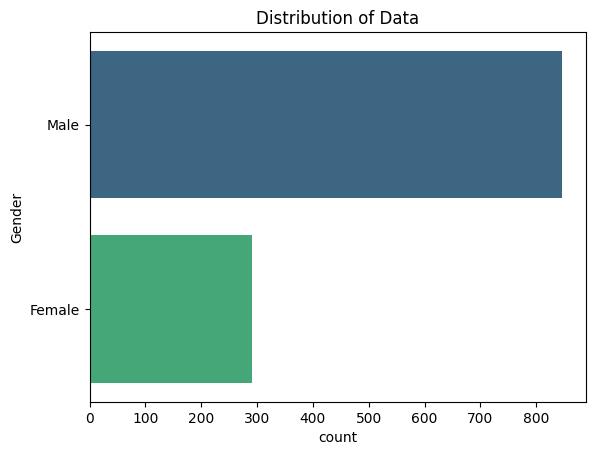

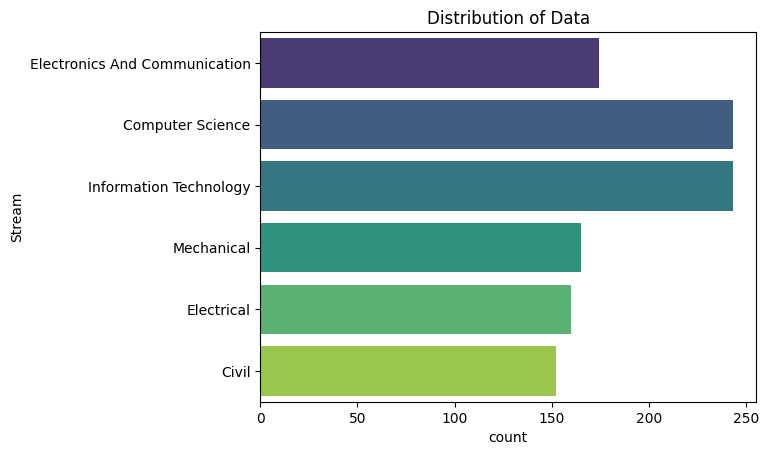

In [15]:
for col in cat_col:
    sns.countplot(df[col],palette='viridis')
    plt.title('Distribution of Data')
    plt.show()

### Distplot for Numerical column

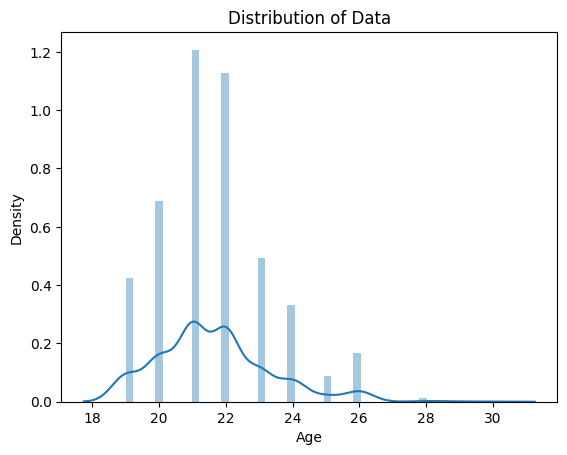

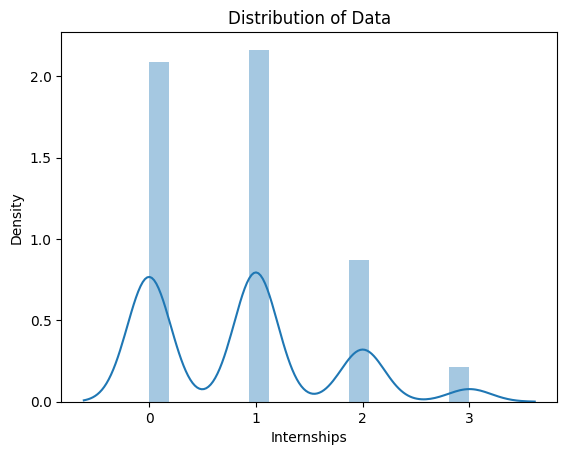

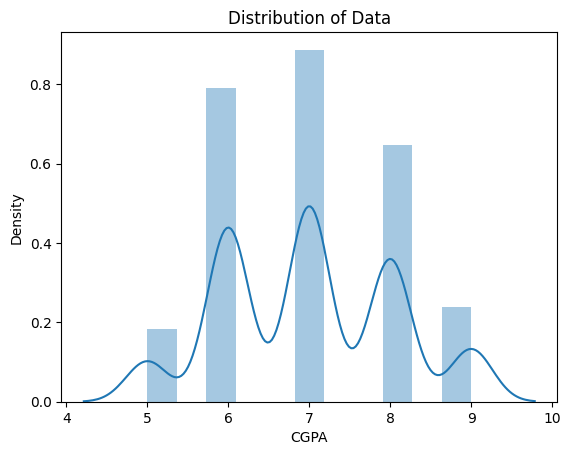

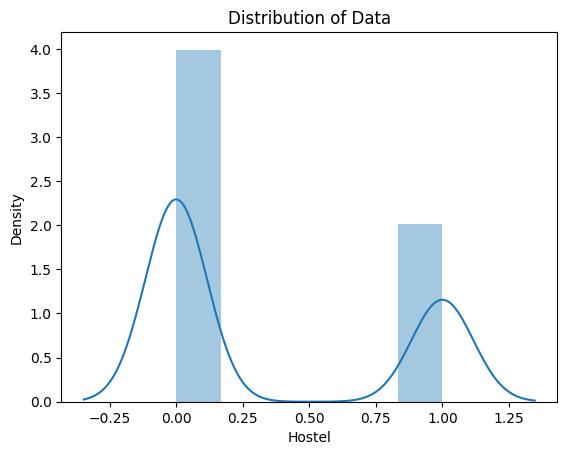

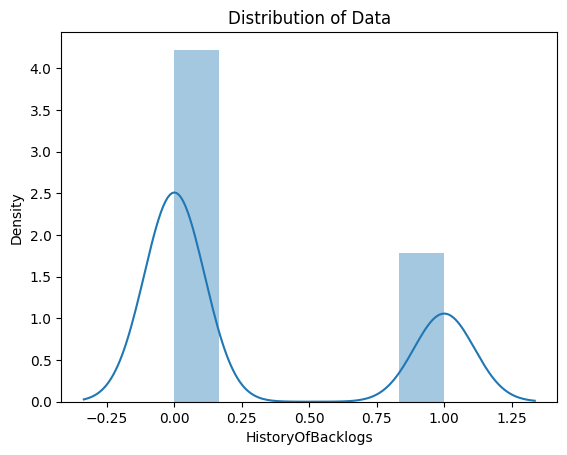

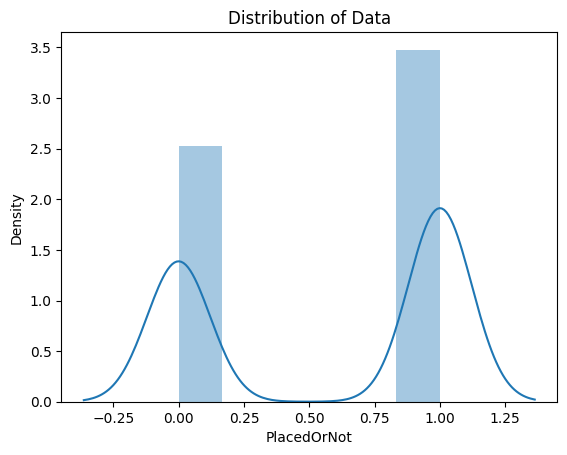

In [16]:
for col in num_col:
    sns.distplot(df[col])
    plt.title('Distribution of Data')
    plt.show()

#### Encoding the Categorical Columns

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [19]:
df.head(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
5,22,1,3,0,6,0,0,0
6,21,1,1,0,7,0,1,0
7,21,1,4,1,7,0,0,0
8,21,1,1,2,6,0,0,1
9,21,0,1,1,6,1,0,0


###  Store Features In X and Response(Target) In  y

In [20]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [21]:
X = df.drop('PlacedOrNot',axis=1)
y= df['PlacedOrNot']

In [22]:
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,3,1,8,1,1
1,21,0,1,0,7,1,1
2,22,0,4,1,6,0,0
3,21,1,4,0,8,0,1
4,22,1,5,0,8,1,0
...,...,...,...,...,...,...,...
2946,23,1,4,1,7,1,1
2952,23,1,5,0,8,1,0
2954,23,0,1,1,8,0,1
2958,23,1,1,0,6,0,1


In [23]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2946    0
2952    1
2954    1
2958    0
2960    0
Name: PlacedOrNot, Length: 1137, dtype: int64

In [24]:
df['PlacedOrNot'].value_counts()

PlacedOrNot
1    659
0    478
Name: count, dtype: int64

### The count is not balance ,so we have to balance the count of placed and not placed student using oversampler technique

In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
ROS = RandomOverSampler()

In [27]:
x_res, y_res = ROS.fit_resample(X,y)

In [28]:
y_res.value_counts()

PlacedOrNot
1    659
0    659
Name: count, dtype: int64

###  Splitting The Dataset Into The Training Set And Testing Set

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)

In [31]:
X_train.shape

(1054, 7)

In [32]:
y_train.shape

(1054,)

In [33]:
X_test.shape

(264, 7)

###  Import The Classification models

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBRFClassifier

### Training the Models

In [35]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svm = SVC()
svm.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

ab=AdaBoostClassifier()
ab.fit(X_train,y_train)

xg=XGBRFClassifier()
xg.fit(X_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

###  Prediction on Test Data

In [36]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)
y_pred7 = ab.predict(X_test)
y_pred8 = xg.predict(X_test)

###  Evaluating the Algorithms with accuracy score

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)
score7=accuracy_score(y_test,y_pred7)
score8=accuracy_score(y_test,y_pred8)

In [39]:
print(score1,score2,score3,score4,score5,score6,score7,score8)

0.7689393939393939 0.7689393939393939 0.803030303030303 0.7992424242424242 0.7840909090909091 0.8371212121212122 0.8446969696969697 0.8522727272727273


In [40]:
xg.score(X_train,y_train)

0.855787476280835

### Checking score of all model in percentage 

In [41]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB','AB','XG'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,
                  score6*100,
                  score7*100,score8*100]})

In [42]:
final_data

,Models,ACC
0,LR,76.893939
1,SVC,76.893939
2,KNN,80.303030
3,DT,79.924242
4,RF,78.409091
5,GB,83.712121
6,AB,84.469697
7,XG,85.227273


### Display the model and their score

In [43]:
for index, row in final_data.iterrows():
    print(f"Model: {row['Models']}, Score: {row['ACC']}")

Model: LR, Score: 76.89393939393939
Model: SVC, Score: 76.89393939393939
Model: KNN, Score: 80.3030303030303
Model: DT, Score: 79.92424242424242
Model: RF, Score: 78.4090909090909
Model: GB, Score: 83.71212121212122
Model: AB, Score: 84.46969696969697
Model: XG, Score: 85.22727272727273


### Best model we got is XG Boost
### Check the training and testing score to check the model is not in overfitting or underfitting condition

In [44]:
xg.score(X_train,y_train)

0.855787476280835

In [45]:
xg.score(X_test,y_test)

0.8522727272727273

In [46]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

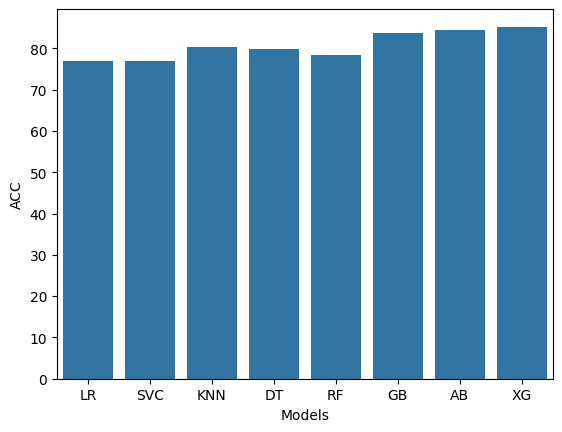

In [47]:
sns.barplot(x='Models', y='ACC', data=final_data)

###  Prediction on New Data

In [48]:
input_data= pd.DataFrame({'Age':22, 'Gender':1, 'Stream':3, 'Internships':1, 'CGPA':9, 'Hostel':0,
       'HistoryOfBacklogs':0},index=[0])

In [49]:
xg=XGBRFClassifier()
xg.fit(X,y)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [50]:
p=xg.predict(input_data)
prob=xg.predict_proba(input_data)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probability of 0.89


In [51]:
p=xg.predict(input_data)
prob=xg.predict_proba(input_data)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probability of 0.89


In [52]:
y_pred9 = xg.predict(X_test)

In [53]:
score9=accuracy_score(y_test,y_pred6)
score9

0.8371212121212122

### Store the best model in pickle file

In [54]:
import pickle

In [55]:
with open('placement.pkl','wb') as file:
    pickle.dump(xg,file)

In [56]:
l=[[22,1,3,0,6,0,0]]
xg.predict(l)

array([0])